In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import netCDF4 as ncc
import xarray as xr

# Load the dataset, compute mean based on grouped data

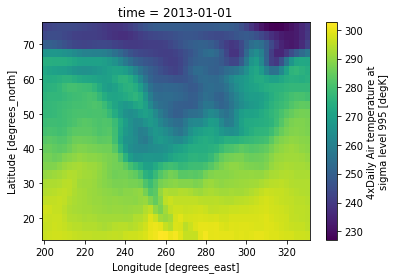

In [ ]:
xr.set_options(keep_attrs=True,display_expand_data=False)

data=xr.tutorial.load_dataset('air_temperature',engine='netcdf4').air
new_data=data
monthly=data.resample(time='M').mean()
dd=data.isel(time=0)
dd.plot()

In [ ]:
data

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
241.2 242.5 243.5 244.0 244.1 243.9 ... 297.9 297.4 297.2 296.5 296.2 295.7
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [ ]:
data.shape

(2920, 25, 53)

In [ ]:
data[10:0]  #10th element along x first axis

<xarray.DataArray 'air' (time: 0, lat: 25, lon: 53)>

Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [ ]:
#better index space might be this  for latitude of 10
data.isel(lat=10)

<xarray.DataArray 'air' (time: 2920, lon: 53)>
277.3 277.4 277.8 278.6 279.5 280.1 ... 273.4 274.7 275.1 276.1 278.3 280.4
Coordinates:
    lat      float32 50.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [ ]:
#label space better than saying lat=50N
data.sel(lat=50)

<xarray.DataArray 'air' (time: 2920, lon: 53)>
277.3 277.4 277.8 278.6 279.5 280.1 ... 273.4 274.7 275.1 276.1 278.3 280.4
Coordinates:
    lat      float32 50.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [ ]:
#if we are not using xarray

dd[10,:]

<xarray.DataArray 'air' (lon: 53)>
277.3 277.4 277.8 278.6 279.5 280.1 ... 280.5 282.9 284.7 286.1 286.9 286.6
Coordinates:
    lat      float32 50.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

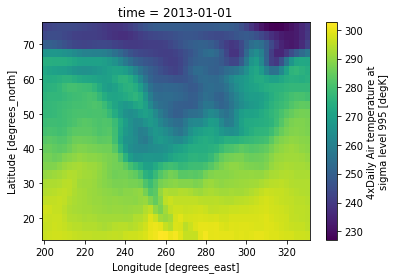

In [ ]:
dd.plot()

In [ ]:
dd.rolling(lat=5,lon=5,center=True)

DataArrayRolling [lat->5(center),lon->5(center)]

In [ ]:
dd.rolling(lat=5,lon=5,center=True).mean()

<xarray.DataArray 'air' (lat: 25, lon: 53)>
nan nan nan nan nan nan nan nan nan nan ... nan nan nan nan nan nan nan nan nan
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [ ]:
mm=dd.rolling(lat=5,lon=5,center=True)

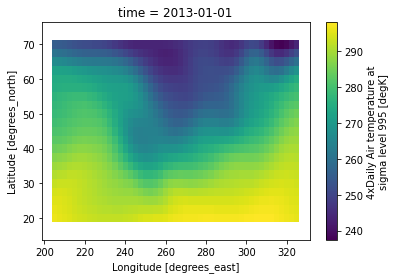

In [ ]:
dd.rolling(lat=5,lon=5,center=True).mean().plot()

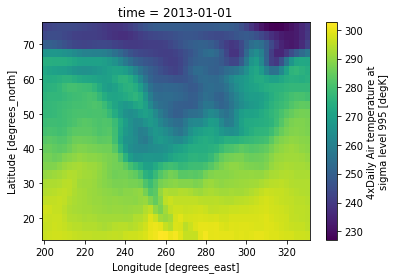

In [ ]:
dd.plot()

In [ ]:
dd1=dd

Exercise:
Calulate the rolling mean in 5 points bins along both latitude and longitude using rolling(........).reduce

In [ ]:
dd.rolling(lat=5,lon=5,center=True).reduce(np.mean)

<xarray.DataArray 'air' (lat: 25, lon: 53)>
nan nan nan nan nan nan nan nan nan nan ... nan nan nan nan nan nan nan nan nan
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

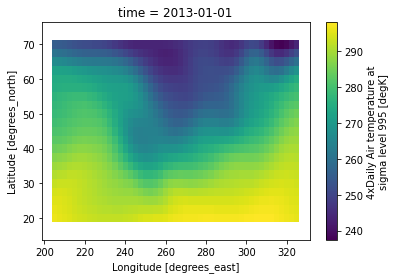

In [ ]:
dd.rolling(lat=5,lon=5,center=True).reduce(np.mean).plot()  #By using numpy

#We can check pick to pick using numpy.

The reduce method receive the function and return plain arrays(eg. numpy). but map method receive the method and returns the xarray object 

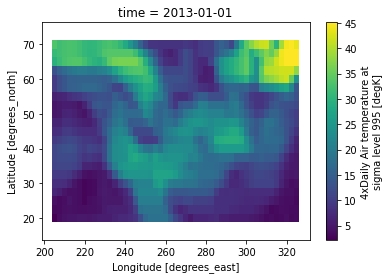

In [ ]:
dd.rolling(lat=5,lon=5,center=True).reduce(np.ptp).plot()

#Plot variability in that window of size 5

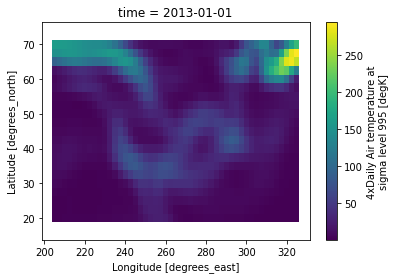

In [ ]:
dd.rolling(lat=5,lon=5,center=True).reduce(np.var).plot()

#Standard deviation

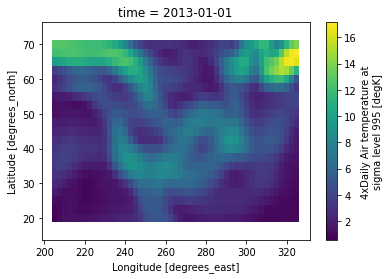

In [ ]:
dd.rolling(lat=5,lon=5,center=True).reduce(np.std).plot()

# Construct new array with new dimension

In [ ]:
simple=xr.DataArray(np.arange(10),dims='time',coords={'time':np.arange(10)})
simple

<xarray.DataArray (time: 10)>
0 1 2 3 4 5 6 7 8 9
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9

In [ ]:
simple.rolling(time=5,center=True).construct('window')#Adding new dimension window, this builds the window of 5 elements by starting with none and 
#with other none values to get 10x10 matrix

<xarray.DataArray (time: 10, window: 5)>
nan nan 0.0 1.0 2.0 nan 0.0 1.0 2.0 3.0 ... 7.0 8.0 9.0 nan 7.0 8.0 9.0 nan nan
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9
Dimensions without coordinates: window

# Using construct helps to do something sensible to the dask array,memory effieciencient, helps to get a big chunck size window, and it works with multiple dimension

In [ ]:
(simple
 .rolling(time=5,center=True)
 .construct('window')
 .mean('window'))

<xarray.DataArray (time: 10)>
1.0 1.5 2.0 3.0 4.0 5.0 6.0 7.0 7.5 8.0
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9

In [ ]:
(data
 .rolling(lat=5,lon=5,center=True)
 .construct(lat='lat_roll',lon='lon_roll'))

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53, lat_roll: 5, lon_roll: 5)>
nan nan nan nan nan nan nan nan nan nan ... nan nan nan nan nan nan nan nan nan
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Dimensions without coordinates: lat_roll, lon_roll
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [ ]:
(data
 .rolling(lat=5,lon=5,center=True)
 .construct(lat='lat_roll',lon='lon_roll'))

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53, lat_roll: 5, lon_roll: 5)>
nan nan nan nan nan nan nan nan nan nan ... nan nan nan nan nan nan nan nan nan
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Dimensions without coordinates: lat_roll, lon_roll
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

# Coarsen works with fixed window size or fixed block. No overalapping, and we need to specify the boundary if the length of the dimension is not a ,multiple of the block size

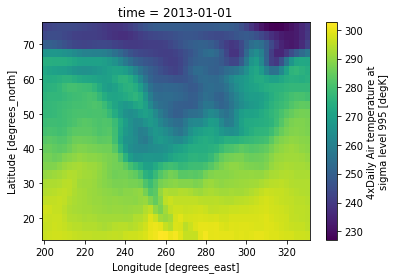

In [ ]:
dd1.plot()

In [ ]:
(dd1
 .coarsen(lat=5,lon=5,boundary='trim')
 .std())

<xarray.DataArray 'air' (lat: 5, lon: 10)>
12.73 12.19 11.7 6.48 2.827 2.738 2.491 ... 4.97 1.925 1.98 1.824 1.17 0.9438
Coordinates:
  * lat      (lat) float32 70.0 57.5 45.0 32.5 20.0
  * lon      (lon) float32 205.0 217.5 230.0 242.5 ... 280.0 292.5 305.0 317.5
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

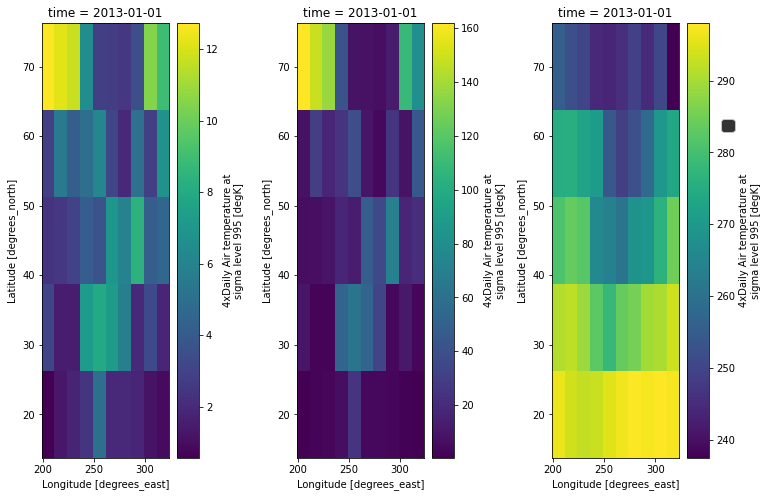

In [ ]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=0.6)
plt.subplot(1,3,1)
(dd1
 .coarsen(lat=5,lon=5,boundary='trim')
 .std()
 .plot())
plt.subplot(1,3,2)
(dd1
 .coarsen(lat=5,lon=5,boundary='trim')
 .var()
 .plot())
plt.subplot(1,3,3)
(dd1
 .coarsen(lat=5,lon=5,boundary='trim')
 .mean()
 .plot())

plt.legend(['standard deviation','variance','mean'],loc='upper right',bbox_to_anchor=(1.5,0.8),facecolor='k',labelcolor='m',fancybox=True,fontsize='xx-large')
plt.show()


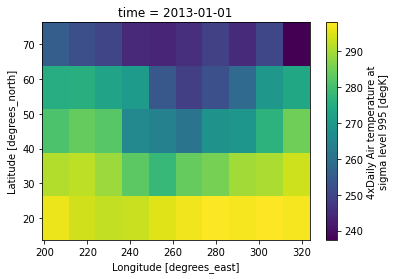

In [ ]:
(dd1
 .coarsen(lat=5,lon=5,boundary='trim')
 .mean()
 .plot())

# EX: coarsen support construct for block reshaping.

Exercise:

by usig coarsen.reduce to apply mean in 5x5 (latxlon) point blocks of data

In [ ]:
(dd1
 .coarsen(lat=5,lon=5,boundary='trim')
 .reduce(np.mean))

<xarray.DataArray 'air' (lat: 5, lon: 10)>
255.3 252.1 249.8 244.3 243.8 245.7 ... 295.0 296.8 297.6 297.2 298.0 297.1
Coordinates:
  * lat      (lat) float32 70.0 57.5 45.0 32.5 20.0
  * lon      (lon) float32 205.0 217.5 230.0 242.5 ... 280.0 292.5 305.0 317.5
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

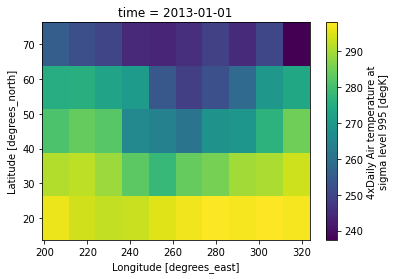

In [ ]:
(dd1
 .coarsen(lat=5,lon=5,boundary='trim')
 .reduce(np.mean)
 .plot())

In [ ]:
month=xr.DataArray(np.tile(np.arange(1,13),reps=2),dims='time',coords={'time':np.arange(1,25)})
month

<xarray.DataArray (time: 24)>
1 2 3 4 5 6 7 8 9 10 11 12 1 2 3 4 5 6 7 8 9 10 11 12
Coordinates:
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 ... 15 16 17 18 19 20 21 22 23 24

In [ ]:
month.coarsen(time=12).construct(time=('year','month')) #create a blocks of size 12 and then call them year and month as second dimension

<xarray.DataArray (year: 2, month: 12)>
1 2 3 4 5 6 7 8 9 10 11 12 1 2 3 4 5 6 7 8 9 10 11 12
Coordinates:
    time     (year, month) int64 1 2 3 4 5 6 7 8 9 ... 17 18 19 20 21 22 23 24
Dimensions without coordinates: year, month

# Time was reshaped , year and months were not labeled as coordinates.

EX:reshape the time dimension of DataArray monthly to year xmonth and visualize the seasonal cycle for two years at 250E

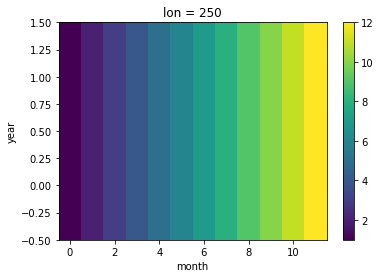

In [ ]:
(xr.DataArray(np.tile(np.arange(1,13),reps=2),dims='time',coords={'time':np.arange(1,25),'lon':250})
.coarsen(time=12)
.construct(time=('year','month'))
.plot())

# If we want to pad at left

In [ ]:
month.pad(time=(1,0))

<xarray.DataArray (time: 25)>
nan 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 ... 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0
Coordinates:
  * time     (time) float64 nan 1.0 2.0 3.0 4.0 5.0 ... 20.0 21.0 22.0 23.0 24.0

In [ ]:
month.isel(time=slice(1,None)).pad(time=(1,0)).coarsen(time=12).construct(time=('year','month'))

<xarray.DataArray (year: 2, month: 12)>
nan 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 ... 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0
Coordinates:
    time     (year, month) float64 nan 2.0 3.0 4.0 5.0 ... 21.0 22.0 23.0 24.0
Dimensions without coordinates: year, month

In [ ]:
monthly

<xarray.DataArray 'air' (time: 24, lat: 25, lon: 53)>
244.5 244.7 244.7 244.5 244.2 243.8 ... 298.2 298.1 298.1 297.7 297.7 297.7
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-31 2013-02-28 ... 2014-12-31
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

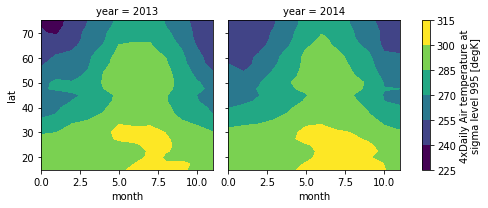

In [ ]:
#splitting time into year x month
# dd=data.resample(time='M').mean()

year_month=monthly.coarsen(time=12).construct(time=('year','month'))

#Assign a nice coordinate value for year

year_month['year']=np.unique(monthly.time.dt.year)
#seasonal cycle for two years
year_month.sel(lon=250).plot.contourf(col='year',x='month',y='lat')

In [ ]:

year_month=monthly.coarsen(time=12).construct(time=('year','month'))

#Assign a nice coordinate value for year

year_month['year']=[2013,2014]
year_month['month']=['jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']
#seasonal cycle for two years
year_month

<xarray.DataArray 'air' (year: 2, month: 12, lat: 25, lon: 53)>
244.5 244.7 244.7 244.5 244.2 243.8 ... 298.2 298.1 298.1 297.7 297.7 297.7
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     (year, month) datetime64[ns] 2013-01-31 2013-02-28 ... 2014-12-31
  * year     (year) int64 2013 2014
  * month    (month) <U4 'jan' 'Feb' 'Mar' 'Apr' ... 'Sep' 'Oct' 'Nov' 'Dec'
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

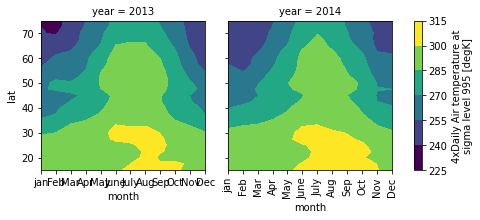

In [ ]:
# ax=plt.gca()
year_month.sel(lon=250).plot.contourf(col='year',x='month',y='lat')
plt.xticks(rotation=90)
plt.show()
# plt.ion()

#Using Groupy, groupby_bins, and resample

In [ ]:
new_data.groupby('time.month')

DataArrayGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

In [ ]:
new_data.groupby('time.month').mean()

<xarray.DataArray 'air' (month: 12, lat: 25, lon: 53)>
246.3 246.4 246.2 245.8 245.2 244.6 ... 298.1 298.0 298.0 297.6 297.6 297.5
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [ ]:
new_data.time.dt.month

<xarray.DataArray 'month' (time: 2920)>
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

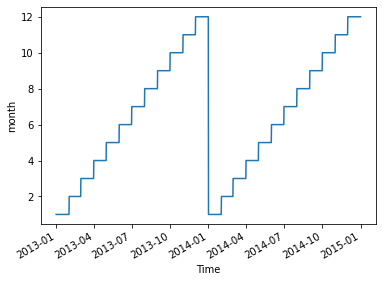

In [ ]:
new_data.time.dt.month.plot()

In [ ]:
new_data.groupby_bins('lat',bins=[20,35,40,45,50])

DataArrayGroupBy, grouped over 'lat_bins'
4 groups with labels (45.0,, 50.0], ..., (20.0,, 35.0].

In [ ]:
new_data.resample(time='M')

DataArrayResample, grouped over '__resample_dim__'
24 groups with labels 2013-01-31, ..., 2014-12-31.

# Building numpy labels

In [ ]:
new_data.time.dt.day

<xarray.DataArray 'day' (time: 2920)>
1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4 ... 28 28 28 29 29 29 29 30 30 30 30 31 31 31 31
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

In [ ]:
new_data.time

<xarray.DataArray 'time' (time: 2920)>
2013-01-01 2013-01-01T06:00:00 ... 2014-12-31T12:00:00 2014-12-31T18:00:00
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    standard_name:  time
    long_name:      Time

In [ ]:
new_data['time.day']

<xarray.DataArray 'day' (time: 2920)>
1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4 ... 28 28 28 29 29 29 29 30 30 30 30 31 31 31 31
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

In [ ]:
# new_data.time.dt.season

In [ ]:
# new_data.time.dt.minute

In [ ]:
# new_data.time.dt.weekofyear

In [ ]:
new_data

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
241.2 242.5 243.5 244.0 244.1 243.9 ... 297.9 297.4 297.2 296.5 296.2 295.7
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [ ]:
months=new_data.time.dt.month.data

# isin is used to construct the custom season

In [ ]:
season=np.full(months.shape, " ") #create an empty array that is filled by "  " to each time step
season[np.isin(months,[12,1,2])]="DJM"  #if the month is the provided list it will assigh that season
season[np.isin(months,[3,4,5])]="MAM"
season[np.isin(months,[6,7,8,9])]="JJAS"
season[np.isin(months,[10,11])]="ON"
season=new_data.time.copy(data=season)
season

<xarray.DataArray 'time' (time: 2920)>
'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D'
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    standard_name:  time
    long_name:      Time

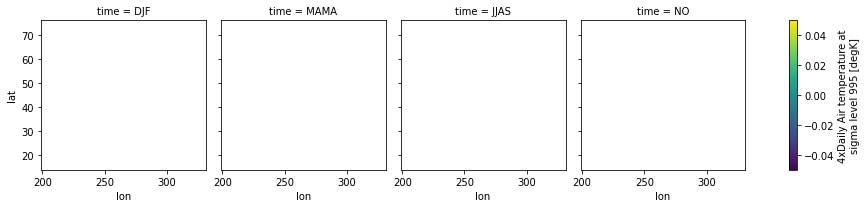

In [ ]:
new_data.groupby(season).mean().reindex(time=["DJF","MAMA","JJAS","NO"]).plot(col="time")

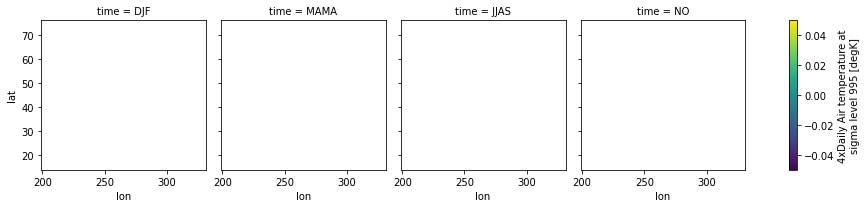

In [ ]:
data.groupby(season).mean().reindex(time=["DJF","MAMA","JJAS","NO"]).plot(col="time")

In [ ]:
new_data.time

<xarray.DataArray 'time' (time: 2920)>
2013-01-01 2013-01-01T06:00:00 ... 2014-12-31T12:00:00 2014-12-31T18:00:00
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    standard_name:  time
    long_name:      Time

In [ ]:
new_data.time.dt.floor('D')

<xarray.DataArray 'floor' (time: 2920)>
2013-01-01 2013-01-01 2013-01-01 2013-01-01 ... 2014-12-31 2014-12-31 2014-12-31
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

#How group by help to reduce things

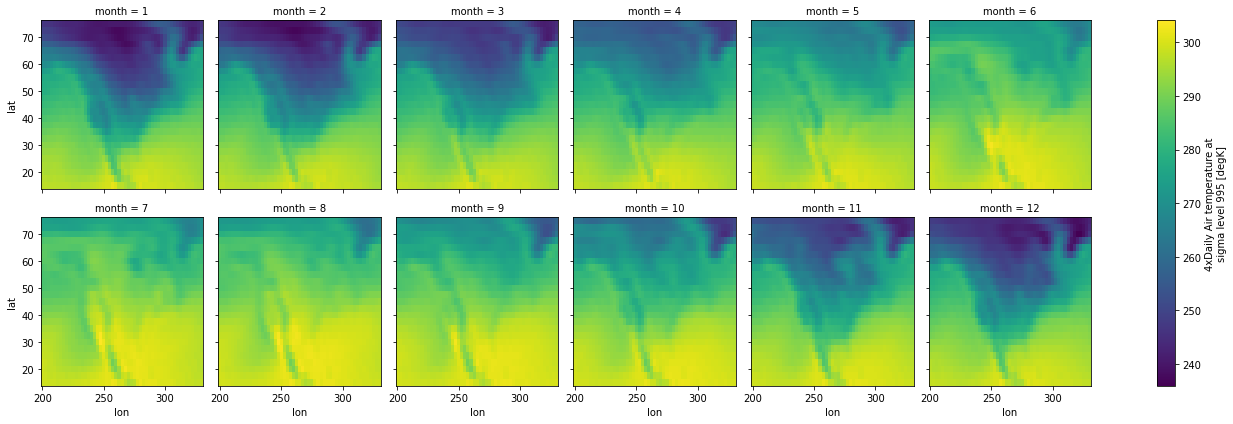

In [ ]:
(new_data
 .groupby('time.month')
 .reduce(np.mean)
 .plot(col='month',col_wrap=6)) #Here col_wrap means the number of figures on the same column,col-->> the label for each figure.

# We can also loop through groupby and and get the corresponding index

In [ ]:
for label, group in new_data.groupby("time.month"):
  print(label)

1
2
3
4
5
6
7
8
9
10
11
12


In [ ]:
group

<xarray.DataArray 'air' (time: 248, lat: 25, lon: 53)>
268.8 266.6 263.8 260.7 257.6 254.8 ... 297.9 297.4 297.2 296.5 296.2 295.7
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-12-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

# We can plot the histogram for the groups that were discovered

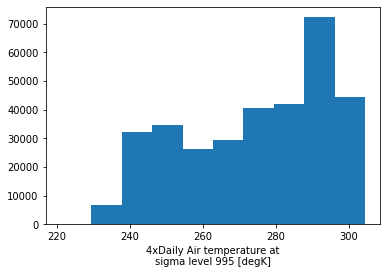

In [ ]:
group.plot.hist()
plt.ion()

# We can Avoid looping by using map function

In [ ]:
def iqr(data,dim):
  "We are going to calculate the interquartile range for input data"

  return (data.quantile(q=0.75,dim=dim)-data.quantile(q=0.25,dim=dim)).rename('iqr')

In [ ]:
new_data.groupby('time.month').map(iqr,dim='time')

<xarray.DataArray 'iqr' (month: 12, lat: 25, lon: 53)>
7.528 7.425 7.025 6.65 6.152 6.135 6.127 ... 0.9 0.9 0.855 1.0 1.3 1.432 1.5
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [ ]:
!pip install xhistogram

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
new_data.dims

('time', 'lat', 'lon')